In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  2  3

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

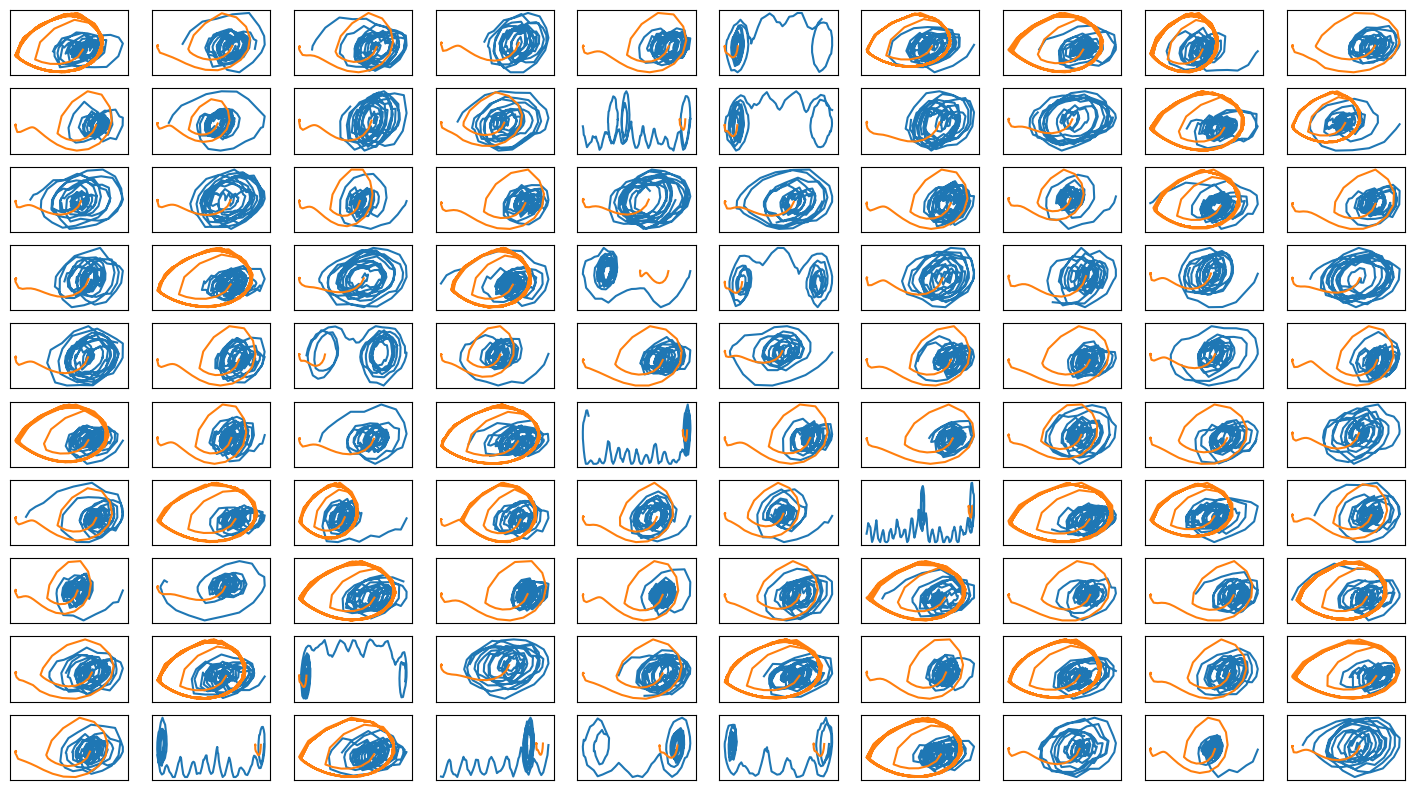

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 681.92071  validloss 513.84007±0.00000  bestvalidloss 513.84007  last_update 0
train: iter 1  trainloss 399.07757  validloss 412.90984±0.00000  bestvalidloss 412.90984  last_update 0
train: iter 2  trainloss 369.51913  validloss 374.40303±0.00000  bestvalidloss 374.40303  last_update 0
train: iter 3  trainloss 345.31727  validloss 358.10566±0.00000  bestvalidloss 358.10566  last_update 0
train: iter 4  trainloss 468.46992  validloss 340.25175±0.00000  bestvalidloss 340.25175  last_update 0
train: iter 5  trainloss 315.21567  validloss 326.11560±0.00000  bestvalidloss 326.11560  last_update 0
train: iter 6  trainloss 296.14028  validloss 306.63919±0.00000  bestvalidloss 306.63919  last_update 0
train: iter 7  trainloss 263.95392  validloss 287.50260±0.00000  bestvalidloss 287.50260  last_update 0
train: iter 8  trainloss 217.97491  validloss 241.53335±0.00000  bestvalidloss 241.53335  last_update 0
train: iter 9  trainloss 149.90323  

train: iter 79  trainloss -476.57884  validloss -430.08435±0.00000  bestvalidloss -441.79169  last_update 5
train: iter 80  trainloss -477.96433  validloss -396.45767±0.00000  bestvalidloss -441.79169  last_update 6
train: iter 81  trainloss -486.27529  validloss -417.37327±0.00000  bestvalidloss -441.79169  last_update 7
train: iter 82  trainloss -488.50882  validloss -421.40875±0.00000  bestvalidloss -441.79169  last_update 8
train: iter 83  trainloss -485.61543  validloss -443.07207±0.00000  bestvalidloss -443.07207  last_update 0
train: iter 84  trainloss -464.91471  validloss -438.33844±0.00000  bestvalidloss -443.07207  last_update 1
train: iter 85  trainloss -440.13959  validloss -413.49724±0.00000  bestvalidloss -443.07207  last_update 2
train: iter 86  trainloss -483.02006  validloss -397.63070±0.00000  bestvalidloss -443.07207  last_update 3
train: iter 87  trainloss -502.08136  validloss -210.55739±0.00000  bestvalidloss -443.07207  last_update 4
train: iter 88  trainloss -4

train: iter 156  trainloss -601.21804  validloss -544.02291±0.00000  bestvalidloss -546.66697  last_update 23
train: iter 157  trainloss -603.62576  validloss -540.49939±0.00000  bestvalidloss -546.66697  last_update 24
train: iter 158  trainloss -604.65541  validloss -542.33442±0.00000  bestvalidloss -546.66697  last_update 25
train: iter 159  trainloss -577.74200  validloss -539.64069±0.00000  bestvalidloss -546.66697  last_update 26
train: iter 160  trainloss -606.83375  validloss -527.19473±0.00000  bestvalidloss -546.66697  last_update 27
train: iter 161  trainloss -612.83248  validloss -552.91830±0.00000  bestvalidloss -552.91830  last_update 0
train: iter 162  trainloss -607.08869  validloss -541.27849±0.00000  bestvalidloss -552.91830  last_update 1
train: iter 163  trainloss -601.11767  validloss -523.84072±0.00000  bestvalidloss -552.91830  last_update 2
train: iter 164  trainloss -564.61489  validloss -523.27720±0.00000  bestvalidloss -552.91830  last_update 3
train: iter 16

train: iter 232  trainloss -651.05373  validloss -605.25258±0.00000  bestvalidloss -606.35690  last_update 4
train: iter 233  trainloss -632.63753  validloss -592.92735±0.00000  bestvalidloss -606.35690  last_update 5
train: iter 234  trainloss -643.18612  validloss -604.44664±0.00000  bestvalidloss -606.35690  last_update 6
train: iter 235  trainloss -657.95869  validloss -583.21784±0.00000  bestvalidloss -606.35690  last_update 7
train: iter 236  trainloss -650.74119  validloss -583.90700±0.00000  bestvalidloss -606.35690  last_update 8
train: iter 237  trainloss -649.73482  validloss -546.63187±0.00000  bestvalidloss -606.35690  last_update 9
train: iter 238  trainloss -640.09186  validloss -586.11608±0.00000  bestvalidloss -606.35690  last_update 10
train: iter 239  trainloss -613.74110  validloss -571.26504±0.00000  bestvalidloss -606.35690  last_update 11
train: iter 240  trainloss -622.12600  validloss -565.97769±0.00000  bestvalidloss -606.35690  last_update 12
train: iter 241 

train: iter 309  trainloss -670.10366  validloss -581.77228±0.00000  bestvalidloss -649.19892  last_update 3
train: iter 310  trainloss -681.30350  validloss -629.96976±0.00000  bestvalidloss -649.19892  last_update 4
train: iter 311  trainloss -683.21650  validloss -647.21587±0.00000  bestvalidloss -649.19892  last_update 5
train: iter 312  trainloss -674.90120  validloss -653.13325±0.00000  bestvalidloss -653.13325  last_update 0
train: iter 313  trainloss -671.31743  validloss -577.10370±0.00000  bestvalidloss -653.13325  last_update 1
train: iter 314  trainloss -671.14502  validloss -603.13445±0.00000  bestvalidloss -653.13325  last_update 2
train: iter 315  trainloss -693.24552  validloss -643.00029±0.00000  bestvalidloss -653.13325  last_update 3
train: iter 316  trainloss -694.54713  validloss -639.28968±0.00000  bestvalidloss -653.13325  last_update 4
train: iter 317  trainloss -664.04984  validloss -658.01789±0.00000  bestvalidloss -658.01789  last_update 0
train: iter 318  tr

train: iter 385  trainloss -716.44823  validloss -661.10730±0.00000  bestvalidloss -681.95215  last_update 8
train: iter 386  trainloss -703.58011  validloss -688.60517±0.00000  bestvalidloss -688.60517  last_update 0
train: iter 387  trainloss -707.48428  validloss -647.92488±0.00000  bestvalidloss -688.60517  last_update 1
train: iter 388  trainloss -705.70760  validloss -667.56390±0.00000  bestvalidloss -688.60517  last_update 2
train: iter 389  trainloss -704.19737  validloss -660.50407±0.00000  bestvalidloss -688.60517  last_update 3
train: iter 390  trainloss -704.98583  validloss -677.56767±0.00000  bestvalidloss -688.60517  last_update 4
train: iter 391  trainloss -713.00229  validloss -684.74154±0.00000  bestvalidloss -688.60517  last_update 5
train: iter 392  trainloss -712.63681  validloss -675.96278±0.00000  bestvalidloss -688.60517  last_update 6
train: iter 393  trainloss -716.88768  validloss -679.93773±0.00000  bestvalidloss -688.60517  last_update 7
train: iter 394  tr

train: iter 460  trainloss -722.26662  validloss -699.16179±0.00000  bestvalidloss -701.92579  last_update 21
train: iter 461  trainloss -741.78780  validloss -696.00945±0.00000  bestvalidloss -701.92579  last_update 22
train: iter 462  trainloss -731.42288  validloss -668.24575±0.00000  bestvalidloss -701.92579  last_update 23
train: iter 463  trainloss -735.65498  validloss -706.00492±0.00000  bestvalidloss -706.00492  last_update 0
train: iter 464  trainloss -708.10491  validloss -688.29629±0.00000  bestvalidloss -706.00492  last_update 1
train: iter 465  trainloss -701.47263  validloss -654.08332±0.00000  bestvalidloss -706.00492  last_update 2
train: iter 466  trainloss -735.53543  validloss -698.97157±0.00000  bestvalidloss -706.00492  last_update 3
train: iter 467  trainloss -705.55757  validloss -696.21485±0.00000  bestvalidloss -706.00492  last_update 4
train: iter 468  trainloss -737.57741  validloss -685.67303±0.00000  bestvalidloss -706.00492  last_update 5
train: iter 469 

train: iter 537  trainloss -771.88137  validloss -659.03361±0.00000  bestvalidloss -736.49759  last_update 5
train: iter 538  trainloss -785.03151  validloss -744.26089±0.00000  bestvalidloss -744.26089  last_update 0
train: iter 539  trainloss -754.09029  validloss -711.59182±0.00000  bestvalidloss -744.26089  last_update 1
train: iter 540  trainloss -770.38743  validloss -711.18009±0.00000  bestvalidloss -744.26089  last_update 2
train: iter 541  trainloss -755.14829  validloss -735.99559±0.00000  bestvalidloss -744.26089  last_update 3
train: iter 542  trainloss -753.67971  validloss -728.73953±0.00000  bestvalidloss -744.26089  last_update 4
train: iter 543  trainloss -775.66695  validloss -733.76537±0.00000  bestvalidloss -744.26089  last_update 5
train: iter 544  trainloss -786.53622  validloss -730.61337±0.00000  bestvalidloss -744.26089  last_update 6
train: iter 545  trainloss -724.85343  validloss -718.68973±0.00000  bestvalidloss -744.26089  last_update 7
train: iter 546  tr

train: iter 613  trainloss -824.45554  validloss -768.68578±0.00000  bestvalidloss -786.37485  last_update 5
train: iter 614  trainloss -841.35812  validloss -749.24710±0.00000  bestvalidloss -786.37485  last_update 6
train: iter 615  trainloss -834.49329  validloss -691.49126±0.00000  bestvalidloss -786.37485  last_update 7
train: iter 616  trainloss -830.89425  validloss -746.90056±0.00000  bestvalidloss -786.37485  last_update 8
train: iter 617  trainloss -807.21653  validloss -722.76427±0.00000  bestvalidloss -786.37485  last_update 9
train: iter 618  trainloss -828.29164  validloss -772.01230±0.00000  bestvalidloss -786.37485  last_update 10
train: iter 619  trainloss -827.71851  validloss -785.16050±0.00000  bestvalidloss -786.37485  last_update 11
train: iter 620  trainloss -829.92866  validloss -787.59602±0.00000  bestvalidloss -787.59602  last_update 0
train: iter 621  trainloss -842.97827  validloss -735.96337±0.00000  bestvalidloss -787.59602  last_update 1
train: iter 622  

train: iter 688  trainloss -841.77753  validloss -805.31917±0.00000  bestvalidloss -811.46275  last_update 3
train: iter 689  trainloss -865.82993  validloss -762.54615±0.00000  bestvalidloss -811.46275  last_update 4
train: iter 690  trainloss -870.61310  validloss -806.01621±0.00000  bestvalidloss -811.46275  last_update 5
train: iter 691  trainloss -684.59097  validloss -826.44603±0.00000  bestvalidloss -826.44603  last_update 0
train: iter 692  trainloss -830.25016  validloss -726.39974±0.00000  bestvalidloss -826.44603  last_update 1
train: iter 693  trainloss -844.41730  validloss -789.29781±0.00000  bestvalidloss -826.44603  last_update 2
train: iter 694  trainloss -825.49654  validloss -743.41593±0.00000  bestvalidloss -826.44603  last_update 3
train: iter 695  trainloss -845.81080  validloss -735.35918±0.00000  bestvalidloss -826.44603  last_update 4
train: iter 696  trainloss -839.95338  validloss -769.90191±0.00000  bestvalidloss -826.44603  last_update 5
train: iter 697  tr

train: iter 763  trainloss -860.67464  validloss -770.80548±0.00000  bestvalidloss -826.44603  last_update 72
train: iter 764  trainloss -878.68369  validloss -827.86909±0.00000  bestvalidloss -827.86909  last_update 0
train: iter 765  trainloss -866.18335  validloss -816.52347±0.00000  bestvalidloss -827.86909  last_update 1
train: iter 766  trainloss -876.24986  validloss -806.53122±0.00000  bestvalidloss -827.86909  last_update 2
train: iter 767  trainloss -867.66260  validloss -818.49217±0.00000  bestvalidloss -827.86909  last_update 3
train: iter 768  trainloss -876.57263  validloss -788.43024±0.00000  bestvalidloss -827.86909  last_update 4
train: iter 769  trainloss -861.61034  validloss -768.99564±0.00000  bestvalidloss -827.86909  last_update 5
train: iter 770  trainloss -857.37267  validloss -713.88452±0.00000  bestvalidloss -827.86909  last_update 6
train: iter 771  trainloss -847.87044  validloss -804.47991±0.00000  bestvalidloss -827.86909  last_update 7
train: iter 772  t

train: iter 838  trainloss -866.88690  validloss -770.36379±0.00000  bestvalidloss -842.91326  last_update 11
train: iter 839  trainloss -898.44582  validloss -819.98371±0.00000  bestvalidloss -842.91326  last_update 12
train: iter 840  trainloss -879.59084  validloss -806.91175±0.00000  bestvalidloss -842.91326  last_update 13
train: iter 841  trainloss -889.59229  validloss -780.38816±0.00000  bestvalidloss -842.91326  last_update 14
train: iter 842  trainloss -886.61119  validloss -811.62098±0.00000  bestvalidloss -842.91326  last_update 15
train: iter 843  trainloss -887.82126  validloss -757.22892±0.00000  bestvalidloss -842.91326  last_update 16
train: iter 844  trainloss -902.29503  validloss -818.15695±0.00000  bestvalidloss -842.91326  last_update 17
train: iter 845  trainloss -868.23811  validloss -763.46921±0.00000  bestvalidloss -842.91326  last_update 18
train: iter 846  trainloss -896.57341  validloss -775.92135±0.00000  bestvalidloss -842.91326  last_update 19
train: ite

train: iter 913  trainloss -905.29461  validloss -817.40875±0.00000  bestvalidloss -848.64426  last_update 16
train: iter 914  trainloss -881.96740  validloss -844.38498±0.00000  bestvalidloss -848.64426  last_update 17
train: iter 915  trainloss -910.38563  validloss -653.56747±0.00000  bestvalidloss -848.64426  last_update 18
train: iter 916  trainloss -894.77607  validloss -817.32827±0.00000  bestvalidloss -848.64426  last_update 19
train: iter 917  trainloss -831.27969  validloss -780.54300±0.00000  bestvalidloss -848.64426  last_update 20
train: iter 918  trainloss -863.90242  validloss -787.50111±0.00000  bestvalidloss -848.64426  last_update 21
train: iter 919  trainloss -876.45372  validloss -822.59520±0.00000  bestvalidloss -848.64426  last_update 22
train: iter 920  trainloss -904.45813  validloss -835.05915±0.00000  bestvalidloss -848.64426  last_update 23
train: iter 921  trainloss -912.07850  validloss -797.45865±0.00000  bestvalidloss -848.64426  last_update 24
train: ite

train: iter 988  trainloss -926.17397  validloss -854.76238±0.00000  bestvalidloss -854.76238  last_update 0
train: iter 989  trainloss -850.97792  validloss -740.92519±0.00000  bestvalidloss -854.76238  last_update 1
train: iter 990  trainloss -924.97189  validloss -841.89171±0.00000  bestvalidloss -854.76238  last_update 2
train: iter 991  trainloss -911.91872  validloss -839.21457±0.00000  bestvalidloss -854.76238  last_update 3
train: iter 992  trainloss -928.94354  validloss -852.13882±0.00000  bestvalidloss -854.76238  last_update 4
train: iter 993  trainloss -930.89936  validloss -841.07295±0.00000  bestvalidloss -854.76238  last_update 5
train: iter 994  trainloss -929.78208  validloss -789.18493±0.00000  bestvalidloss -854.76238  last_update 6
train: iter 995  trainloss -878.04079  validloss -802.84132±0.00000  bestvalidloss -854.76238  last_update 7
train: iter 996  trainloss -911.64519  validloss -842.76716±0.00000  bestvalidloss -854.76238  last_update 8
train: iter 997  tr

train: iter 1063  trainloss -906.88965  validloss -799.53118±0.00000  bestvalidloss -866.96293  last_update 57
train: iter 1064  trainloss -929.34992  validloss -828.59659±0.00000  bestvalidloss -866.96293  last_update 58
train: iter 1065  trainloss -912.44053  validloss -835.69136±0.00000  bestvalidloss -866.96293  last_update 59
train: iter 1066  trainloss -746.00649  validloss -755.23022±0.00000  bestvalidloss -866.96293  last_update 60
train: iter 1067  trainloss -858.35599  validloss -788.83743±0.00000  bestvalidloss -866.96293  last_update 61
train: iter 1068  trainloss -939.53474  validloss -855.77722±0.00000  bestvalidloss -866.96293  last_update 62
train: iter 1069  trainloss -924.17340  validloss -872.99679±0.00000  bestvalidloss -872.99679  last_update 0
train: iter 1070  trainloss -920.85999  validloss -857.80236±0.00000  bestvalidloss -872.99679  last_update 1
train: iter 1071  trainloss -936.30286  validloss -847.74992±0.00000  bestvalidloss -872.99679  last_update 2
trai

train: iter 1137  trainloss -955.26105  validloss -832.41187±0.00000  bestvalidloss -872.99679  last_update 68
train: iter 1138  trainloss -911.97213  validloss -835.30121±0.00000  bestvalidloss -872.99679  last_update 69
train: iter 1139  trainloss -931.95699  validloss -793.57963±0.00000  bestvalidloss -872.99679  last_update 70
train: iter 1140  trainloss -935.46955  validloss -770.39212±0.00000  bestvalidloss -872.99679  last_update 71
train: iter 1141  trainloss -942.01143  validloss -827.43018±0.00000  bestvalidloss -872.99679  last_update 72
train: iter 1142  trainloss -948.10466  validloss -852.59346±0.00000  bestvalidloss -872.99679  last_update 73
train: iter 1143  trainloss -929.12772  validloss -848.03188±0.00000  bestvalidloss -872.99679  last_update 74
train: iter 1144  trainloss -939.39601  validloss -861.98562±0.00000  bestvalidloss -872.99679  last_update 75
train: iter 1145  trainloss -924.92786  validloss -797.66562±0.00000  bestvalidloss -872.99679  last_update 76
t

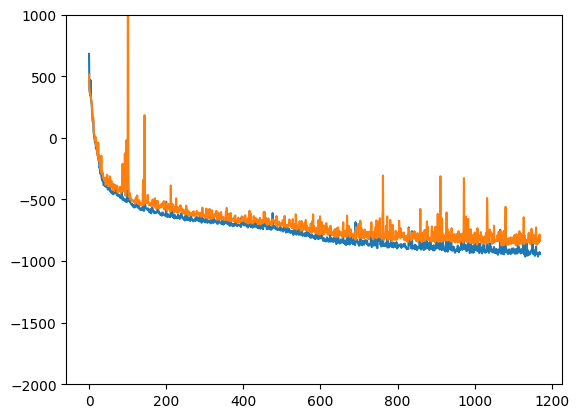

train_weighted_vae: enc
train: iter 0  trainloss -947.23325  validloss -874.01281±0.00000  bestvalidloss -874.01281  last_update 0
train: iter 1  trainloss -955.00143  validloss -848.66207±0.00000  bestvalidloss -874.01281  last_update 1
train: iter 2  trainloss -946.73456  validloss -792.26767±0.00000  bestvalidloss -874.01281  last_update 2
train: iter 3  trainloss -952.74221  validloss -875.42393±0.00000  bestvalidloss -875.42393  last_update 0
train: iter 4  trainloss -943.67246  validloss -861.12327±0.00000  bestvalidloss -875.42393  last_update 1
train: iter 5  trainloss -950.74779  validloss -863.17538±0.00000  bestvalidloss -875.42393  last_update 2
train: iter 6  trainloss -930.01367  validloss -835.40158±0.00000  bestvalidloss -875.42393  last_update 3
train: iter 7  trainloss -940.67309  validloss -826.65706±0.00000  bestvalidloss -875.42393  last_update 4
train: iter 8  trainloss -950.18902  validloss -845.09525±0.00000  bestvalidloss -875.42393  last_update 5
train: iter 9

train: iter 78  trainloss -937.94983  validloss -855.12134±0.00000  bestvalidloss -878.99404  last_update 38
train: iter 79  trainloss -946.52678  validloss -872.16665±0.00000  bestvalidloss -878.99404  last_update 39
train: iter 80  trainloss -952.30894  validloss -861.63968±0.00000  bestvalidloss -878.99404  last_update 40
train: iter 81  trainloss -954.95004  validloss -853.24175±0.00000  bestvalidloss -878.99404  last_update 41
train: iter 82  trainloss -952.78116  validloss -861.58458±0.00000  bestvalidloss -878.99404  last_update 42
train: iter 83  trainloss -952.37867  validloss -874.92121±0.00000  bestvalidloss -878.99404  last_update 43
train: iter 84  trainloss -953.03757  validloss -863.34643±0.00000  bestvalidloss -878.99404  last_update 44
train: iter 85  trainloss -950.26530  validloss -856.62803±0.00000  bestvalidloss -878.99404  last_update 45
train: iter 86  trainloss -954.83976  validloss -870.30606±0.00000  bestvalidloss -878.99404  last_update 46
train: iter 87  tra

train: iter 153  trainloss -959.66404  validloss -857.50770±0.00000  bestvalidloss -883.29853  last_update 50
train: iter 154  trainloss -959.57996  validloss -856.40911±0.00000  bestvalidloss -883.29853  last_update 51
train: iter 155  trainloss -962.28867  validloss -858.52800±0.00000  bestvalidloss -883.29853  last_update 52
train: iter 156  trainloss -960.20775  validloss -867.40302±0.00000  bestvalidloss -883.29853  last_update 53
train: iter 157  trainloss -942.81768  validloss -833.89749±0.00000  bestvalidloss -883.29853  last_update 54
train: iter 158  trainloss -957.02096  validloss -859.44788±0.00000  bestvalidloss -883.29853  last_update 55
train: iter 159  trainloss -957.41989  validloss -843.46625±0.00000  bestvalidloss -883.29853  last_update 56
train: iter 160  trainloss -957.93442  validloss -863.19501±0.00000  bestvalidloss -883.29853  last_update 57
train: iter 161  trainloss -954.50912  validloss -862.18259±0.00000  bestvalidloss -883.29853  last_update 58
train: ite

train: iter 25  trainloss -962.30524  validloss -855.13382±0.00000  bestvalidloss -870.93443  last_update 25
train: iter 26  trainloss -951.37712  validloss -845.13463±0.00000  bestvalidloss -870.93443  last_update 26
train: iter 27  trainloss -959.29856  validloss -854.09988±0.00000  bestvalidloss -870.93443  last_update 27
train: iter 28  trainloss -938.07308  validloss -858.02886±0.00000  bestvalidloss -870.93443  last_update 28
train: iter 29  trainloss -960.77671  validloss -862.58794±0.00000  bestvalidloss -870.93443  last_update 29
train: iter 30  trainloss -968.37370  validloss -841.62958±0.00000  bestvalidloss -870.93443  last_update 30
train: iter 31  trainloss -931.04673  validloss -852.00233±0.00000  bestvalidloss -870.93443  last_update 31
train: iter 32  trainloss -894.81712  validloss -862.70118±0.00000  bestvalidloss -870.93443  last_update 32
train: iter 33  trainloss -947.06460  validloss -842.05799±0.00000  bestvalidloss -870.93443  last_update 33
train: iter 34  tra

train: iter 101  trainloss -953.48190  validloss -856.61151±0.00000  bestvalidloss -873.96575  last_update 3
train: iter 102  trainloss -963.51311  validloss -872.21055±0.00000  bestvalidloss -873.96575  last_update 4
train: iter 103  trainloss -945.57321  validloss -835.80578±0.00000  bestvalidloss -873.96575  last_update 5
train: iter 104  trainloss -903.23952  validloss -782.90410±0.00000  bestvalidloss -873.96575  last_update 6
train: iter 105  trainloss -931.29345  validloss -804.15697±0.00000  bestvalidloss -873.96575  last_update 7
train: iter 106  trainloss -973.52569  validloss -863.40831±0.00000  bestvalidloss -873.96575  last_update 8
train: iter 107  trainloss -949.52059  validloss -843.20783±0.00000  bestvalidloss -873.96575  last_update 9
train: iter 108  trainloss -909.91958  validloss -859.58972±0.00000  bestvalidloss -873.96575  last_update 10
train: iter 109  trainloss -941.27291  validloss -839.28282±0.00000  bestvalidloss -873.96575  last_update 11
train: iter 110  

train: iter 178  trainloss -937.39597  validloss -463.43953±0.00000  bestvalidloss -880.92552  last_update 59
train: iter 179  trainloss -977.85456  validloss -846.39828±0.00000  bestvalidloss -880.92552  last_update 60
train: iter 180  trainloss -972.51441  validloss -828.20450±0.00000  bestvalidloss -880.92552  last_update 61
train: iter 181  trainloss -931.70105  validloss -830.98078±0.00000  bestvalidloss -880.92552  last_update 62
train: iter 182  trainloss -968.16301  validloss -785.29831±0.00000  bestvalidloss -880.92552  last_update 63
train: iter 183  trainloss -967.20178  validloss -843.15365±0.00000  bestvalidloss -880.92552  last_update 64
train: iter 184  trainloss -971.37407  validloss -849.89407±0.00000  bestvalidloss -880.92552  last_update 65
train: iter 185  trainloss -971.86480  validloss -789.74289±0.00000  bestvalidloss -880.92552  last_update 66
train: iter 186  trainloss -973.61549  validloss -859.23699±0.00000  bestvalidloss -880.92552  last_update 67
train: ite

train: iter 253  trainloss -845.61191  validloss -843.38806±0.00000  bestvalidloss -880.93474  last_update 42
train: iter 254  trainloss -919.36508  validloss -320.11821±0.00000  bestvalidloss -880.93474  last_update 43
train: iter 255  trainloss -987.92933  validloss -871.99306±0.00000  bestvalidloss -880.93474  last_update 44
train: iter 256  trainloss -979.17745  validloss -823.53322±0.00000  bestvalidloss -880.93474  last_update 45
train: iter 257  trainloss -977.72281  validloss -856.16504±0.00000  bestvalidloss -880.93474  last_update 46
train: iter 258  trainloss -979.94697  validloss -845.81175±0.00000  bestvalidloss -880.93474  last_update 47
train: iter 259  trainloss -989.10074  validloss -860.31870±0.00000  bestvalidloss -880.93474  last_update 48
train: iter 260  trainloss -972.53013  validloss -863.34930±0.00000  bestvalidloss -880.93474  last_update 49
train: iter 261  trainloss -964.45060  validloss -832.45267±0.00000  bestvalidloss -880.93474  last_update 50
train: ite

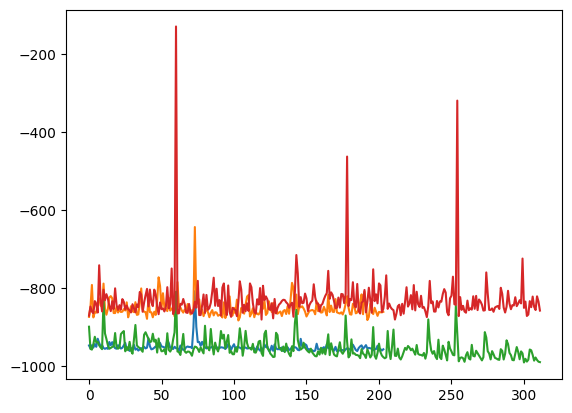

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()


In [10]:
vi.load()
vi.update_mulogvar_offlinedata()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

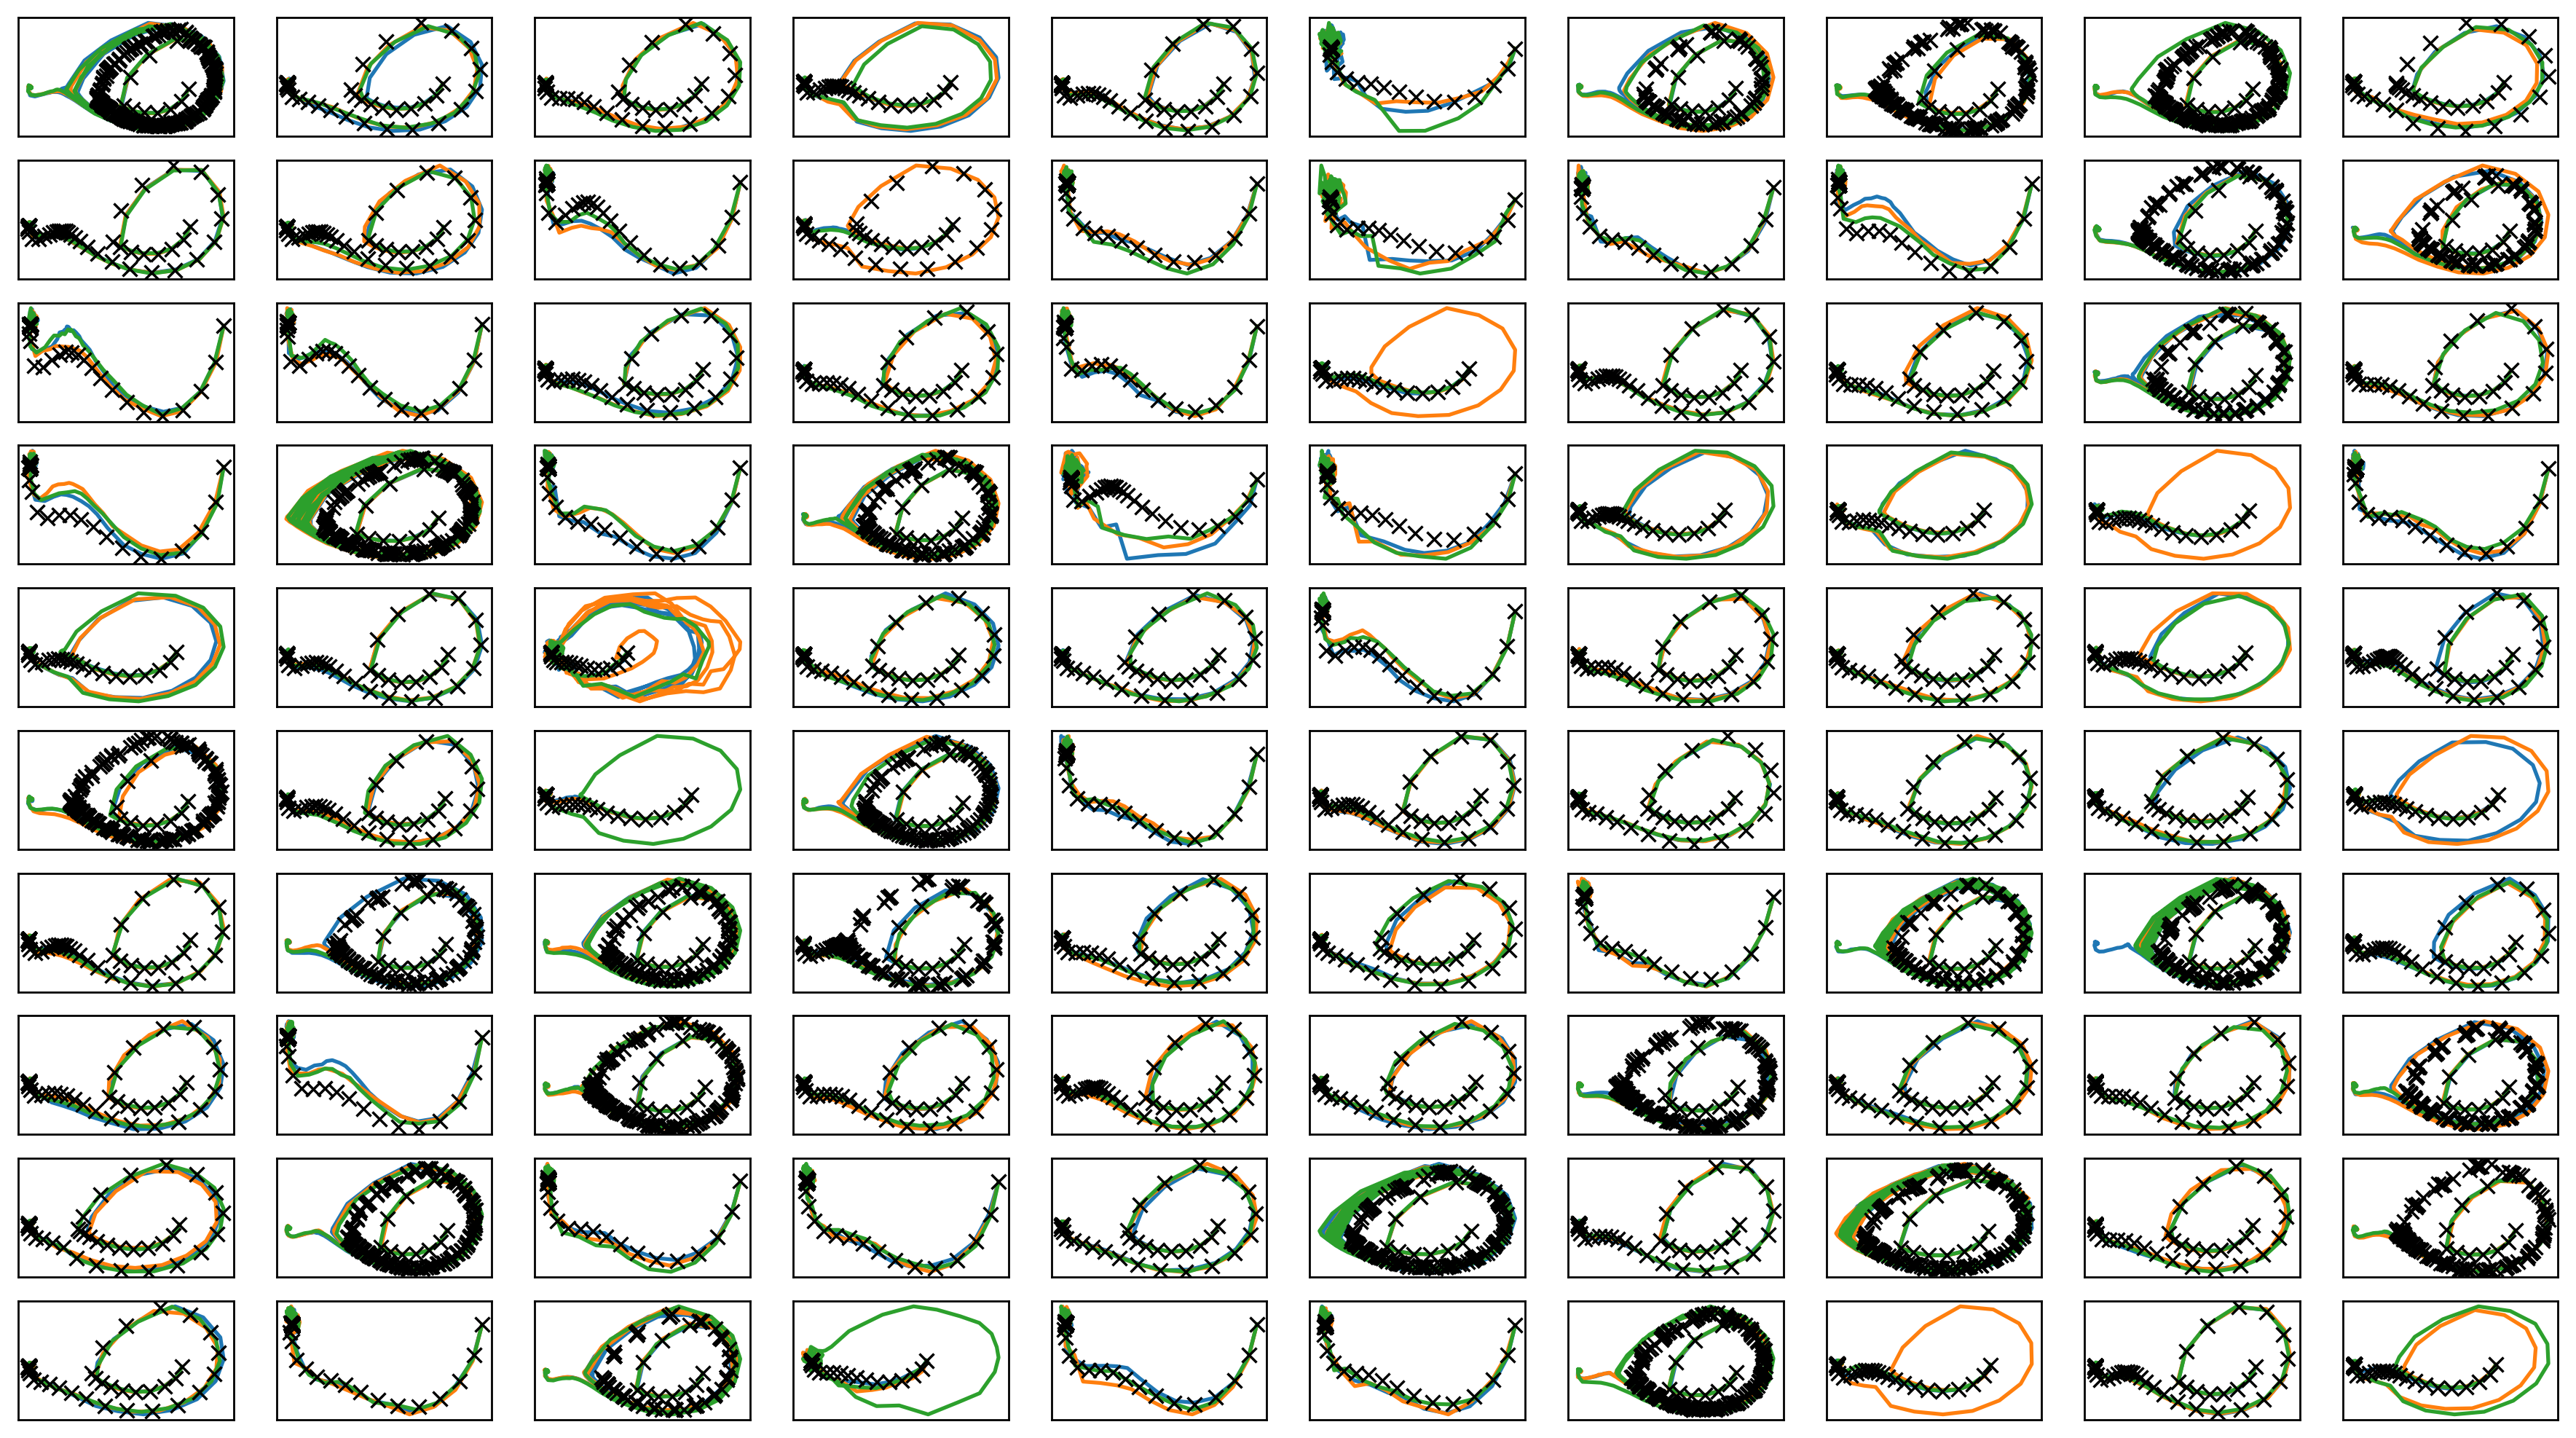

In [11]:
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
#     ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
#     ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

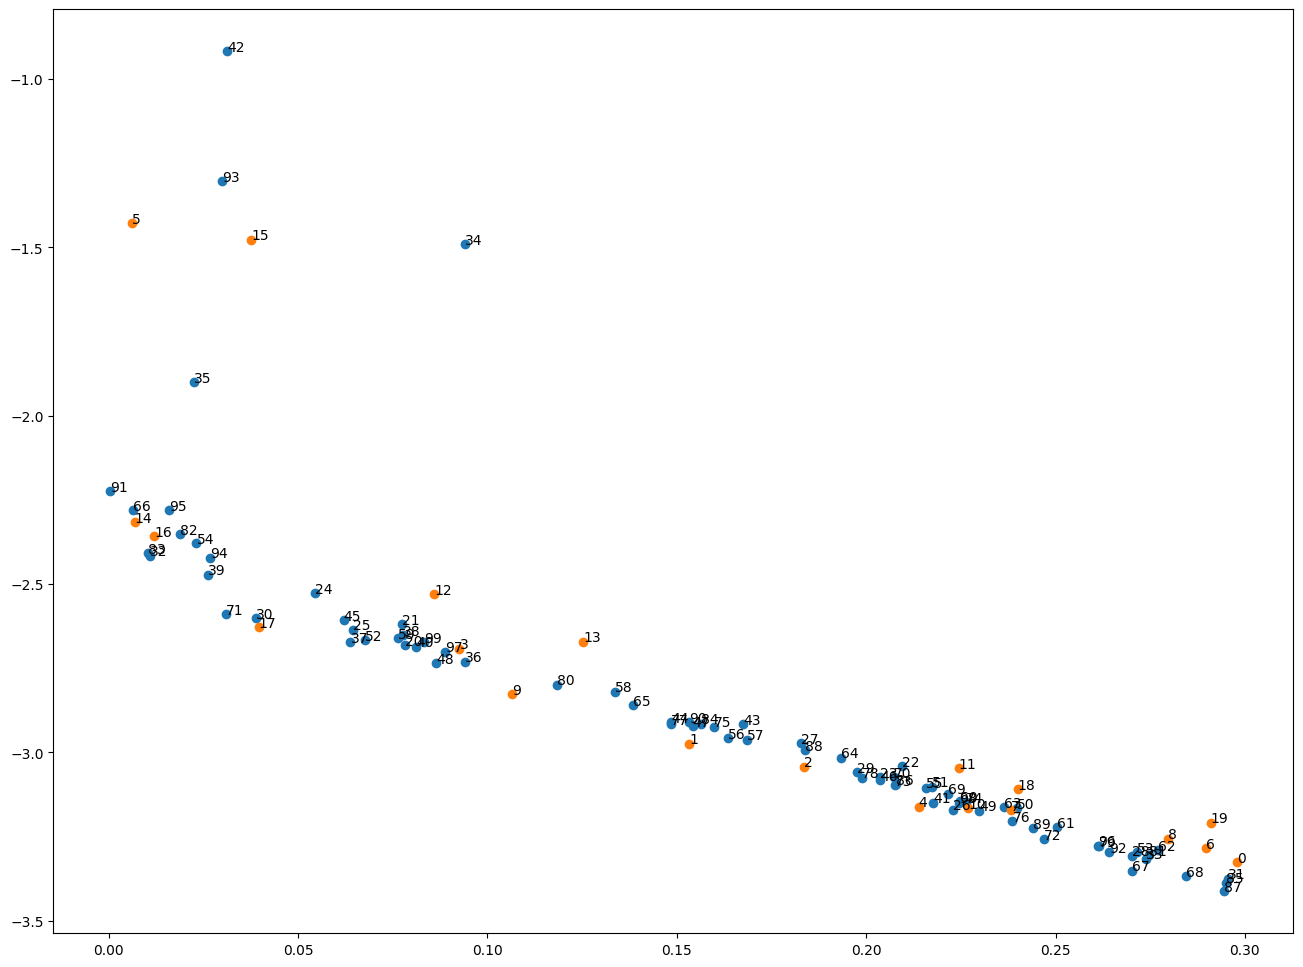

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_offlinedata)):
    np_mulogvar.append(vi.mulogvar_offlinedata[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


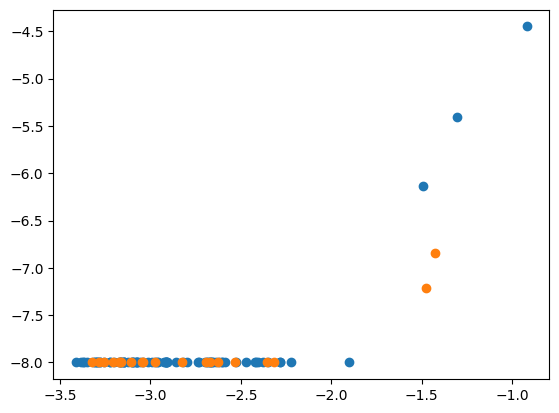

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-26 01:32:26.477552


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 4.86497  validloss 4.95633±0.00000  bestvalidloss 4.95633  last_update 0
train: iter 1  trainloss 4.42643  validloss 4.48476±0.00000  bestvalidloss 4.48476  last_update 0
train: iter 2  trainloss 4.07666  validloss 4.11788±0.00000  bestvalidloss 4.11788  last_update 0
train: iter 3  trainloss 3.77604  validloss 3.78805±0.00000  bestvalidloss 3.78805  last_update 0
train: iter 4  trainloss 3.52156  validloss 3.53539±0.00000  bestvalidloss 3.53539  last_update 0
train: iter 5  trainloss 3.31116  validloss 3.30396±0.00000  bestvalidloss 3.30396  last_update 0
train: iter 6  trainloss 3.12959  validloss 3.12471±0.00000  bestvalidloss 3.12471  last_update 0
train: iter 7  trainloss 2.97339  validloss 2.95186±0.00000  bestvalidloss 2.95186  last_update 0
train: iter 8  trainloss 2.82383  validloss 2.81597±0.00000  bestvalidloss 2.81597  last_update 0
train: iter 9  trainloss 2.70967  validloss 2.69343±0.00000  bestvalidloss 2.69343  last_update 0
train: iter 10  trai

train: iter 88  trainloss 0.65297  validloss 0.78748±0.00000  bestvalidloss 0.78384  last_update 2
train: iter 89  trainloss 0.67020  validloss 0.79591±0.00000  bestvalidloss 0.78384  last_update 3
train: iter 90  trainloss 0.65488  validloss 0.80557±0.00000  bestvalidloss 0.78384  last_update 4
train: iter 91  trainloss 0.65946  validloss 0.82089±0.00000  bestvalidloss 0.78384  last_update 5
train: iter 92  trainloss 0.64352  validloss 0.79124±0.00000  bestvalidloss 0.78384  last_update 6
train: iter 93  trainloss 0.63649  validloss 0.81640±0.00000  bestvalidloss 0.78384  last_update 7
train: iter 94  trainloss 0.65221  validloss 0.80407±0.00000  bestvalidloss 0.78384  last_update 8
train: iter 95  trainloss 0.63806  validloss 0.80243±0.00000  bestvalidloss 0.78384  last_update 9
train: iter 96  trainloss 0.62592  validloss 0.80022±0.00000  bestvalidloss 0.78384  last_update 10
train: iter 97  trainloss 0.63849  validloss 0.80737±0.00000  bestvalidloss 0.78384  last_update 11
train: i

train: iter 170  trainloss 0.67543  validloss 0.81994±0.00000  bestvalidloss 0.78384  last_update 84
train: iter 171  trainloss 0.64240  validloss 0.82940±0.00000  bestvalidloss 0.78384  last_update 85
train: iter 172  trainloss 0.64590  validloss 0.82550±0.00000  bestvalidloss 0.78384  last_update 86
train: iter 173  trainloss 0.64745  validloss 0.81016±0.00000  bestvalidloss 0.78384  last_update 87
train: iter 174  trainloss 0.63948  validloss 0.83123±0.00000  bestvalidloss 0.78384  last_update 88
train: iter 175  trainloss 0.62229  validloss 0.83609±0.00000  bestvalidloss 0.78384  last_update 89
train: iter 176  trainloss 0.63427  validloss 0.82610±0.00000  bestvalidloss 0.78384  last_update 90
train: iter 177  trainloss 0.66396  validloss 0.80320±0.00000  bestvalidloss 0.78384  last_update 91
train: iter 178  trainloss 0.65235  validloss 0.85094±0.00000  bestvalidloss 0.78384  last_update 92
train: iter 179  trainloss 0.62282  validloss 0.86084±0.00000  bestvalidloss 0.78384  last_

In [16]:
print(vi.initial_belief)

Parameter containing:
tensor([-2.8555, -1.5457], requires_grad=True)


In [17]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

get_belief 720 compute_time 0.3545410633087158 best_loss -1102.19482421875 loss.item() -1097.4727783203125
get_belief 899 compute_time 0.4406862258911133 best_loss -762.4754028320312 loss.item() -760.6968383789062
get_belief 634 compute_time 0.3144962787628174 best_loss -975.3036499023438 loss.item() -975.0701293945312


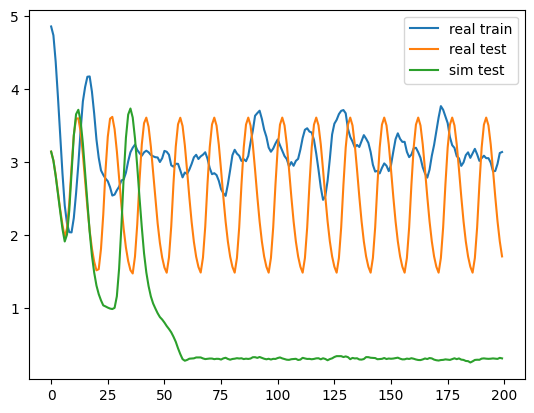

encoder [-3.2082815 -8.       ]
initial_belief tensor([-2.8555, -1.5457])
real train tensor([-3.3231, -7.9314])
real test tensor([-3.4574, -7.9325])
sim tensor([-3.2074, -7.9183])


In [22]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-3.2551020408163267


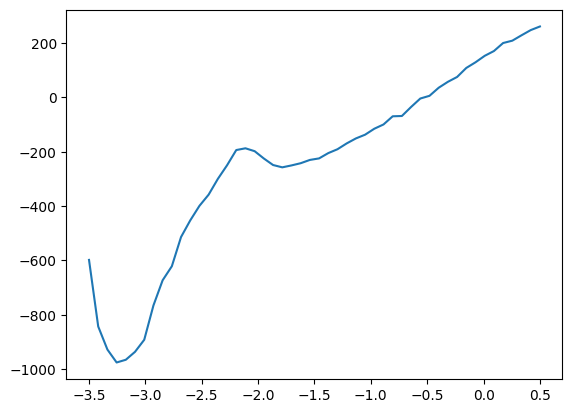

In [23]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
z_array = np.linspace(-3.5,0.5)
nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)
print(z_array[np.argmin(nll_list)])